In [1]:
from Utils import *
from import_data import * 

In [2]:
from keras.datasets import mnist
from sklearn.decomposition import PCA

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Using TensorFlow backend.
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/antonio/.local/lib/python3.6/site-packages/tensorflow/py

Traning data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


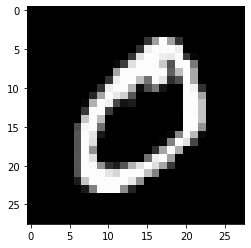

In [3]:
# pick a sample to plot
sample = 1
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
num = 10
images = x_train[:num]
labels = y_train[:num]

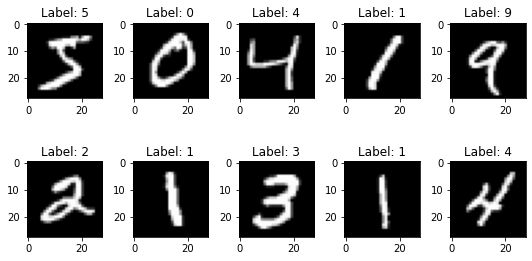

In [5]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train_flat = x_train.reshape(-1,784)

In [8]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_mnist = pd.DataFrame(x_train_flat,columns=feat_cols)

In [9]:
df_mnist['label'] = y_train

In [10]:
print('Size of the dataframe: {}'.format(df_mnist.shape))
df=df_mnist.sample(frac=.01)
del df_mnist

Size of the dataframe: (60000, 785)


In [11]:
df.shape

(600, 785)

In [12]:
g = df.groupby('label')
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df.label.value_counts()

9    47
8    47
7    47
6    47
5    47
4    47
3    47
2    47
1    47
0    47
Name: label, dtype: int64

In [13]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
label                                                                     
0     0       0       0       0       0       0       0       0       0   
      1       0       0       0       0       0       0       0       0   
      2       0       0       0       0       0       0       0       0   
      3       0       0       0       0       0       0       0       0   
      4       0       0       0       0       0       0       0       0   

         pixel8  pixel9  ...  pixel775  pixel776  pixel777  pixel778  \
label                    ...                                           
0     0       0       0  ...         0         0         0         0   
      1       0       0  ...         0         0         0         0   
      2       0       0  ...         0         0         0         0   
      3       0       0  ...         0         0         0         0   
      4       0       0  ...         0         0         0         0   

         pixel779  pixel780  pixel781  pixel782  pixel783  label  
label                                                             
0     0         0         0         0         0         0      0  
      1         0         0         0         0         0      0  
      2         0         0         0         0         0      0  
      3         0         0         0         0         0      0  
      4         0         0         0         0         0      0  

[5 rows x 785 columns]

In [14]:
pca_mnist = PCA(n_components=2)
principalComponents_mnist = pca_mnist.fit_transform(df.iloc[:,:-1])

In [15]:
principalComponents_mnist.shape

(470, 2)

In [16]:
data_pca = pd.DataFrame(data = principalComponents_mnist,
                        columns = ['x'+str(i) for i in range(principalComponents_mnist.shape[1])])
data_pca['Y'] = df.iloc[:,-1:].to_numpy()

In [17]:
data_pca

,x0,x1,Y
0,1022.140889,-220.495593,0
1,785.223388,46.970889,0
2,1115.970964,340.704867,0
3,319.660887,-436.385791,0
4,1177.880180,-20.232614,0
...,...,...,...
465,208.458401,330.606262,9
466,-511.401965,-19.350988,9
467,-256.417678,990.920083,9
468,-775.327089,107.230182,9


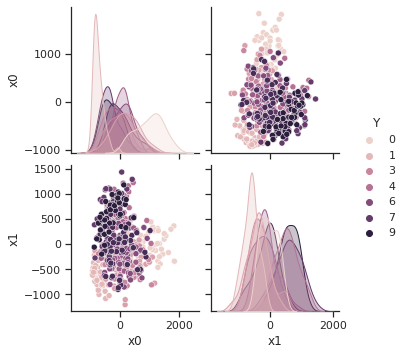

In [18]:
sns.set_theme(style="ticks")
sns.pairplot(data_pca, hue="Y")
plt.show()

<AxesSubplot:xlabel='x0', ylabel='x1'>

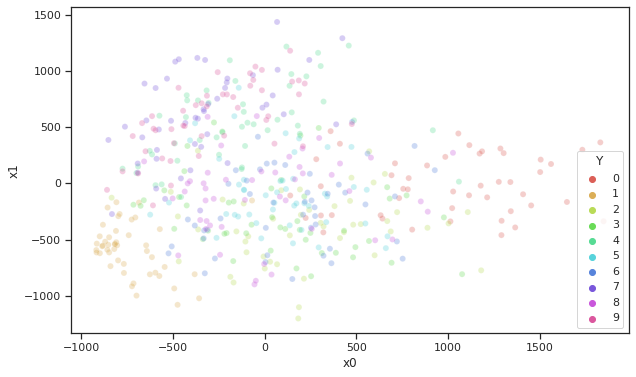

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="x0", y="x1",
    hue="Y",
    palette=sns.color_palette("hls", len(data_pca.Y.unique())),
    data=data_pca,
    legend="full",
    alpha=0.3
)

In [20]:
c0=0
c1=9
data = data_pca.copy()

In [21]:
data = data[(data.Y==c0) | (data.Y==c1)]
data.Y = ((data.Y)-c0)/c1

<AxesSubplot:xlabel='x0', ylabel='x1'>

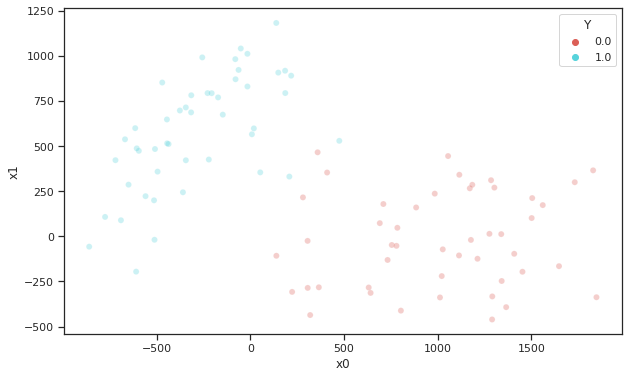

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="x0", y="x1",
    hue="Y",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)

In [23]:
x_train = data.iloc[:, 0:2].to_numpy()
X = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
Y = data.Y.to_numpy()

<AxesSubplot:xlabel='x1', ylabel='x2'>

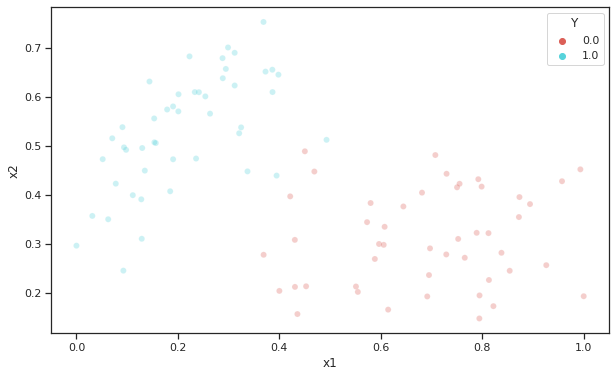

In [24]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['Y']=Y
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="x1", y="x2",
    hue="Y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

In [25]:
# normalize each input
normalization = np.sqrt(np.sum(X ** 2, -1))
X_norm = (X.T / normalization).T
print("First X sample (normalized):", X_norm[5])

First X sample (normalized): [0.96558241 0.26009731]


<AxesSubplot:xlabel='x1', ylabel='x2'>

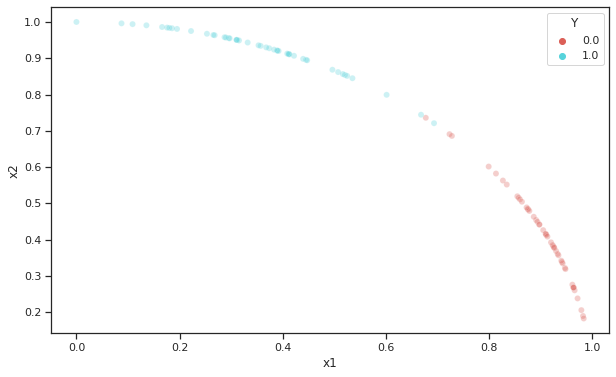

In [26]:
data = pd.DataFrame(X_norm, columns=['x1', 'x2'])
data['Y']=Y
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="x1", y="x2",
    hue="Y",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)

In [27]:
def get_Sx(ang=None, x=None, pad=False):
    backend = Aer.get_backend('unitary_simulator')

    if pad==True:
        q = QuantumRegister(2)
        circuit = QuantumCircuit(q)
        circuit = state_preparation(ang, circuit, [0, 1])
    elif pad==False:
        x = x.astype(complex)
        q = QuantumRegister(1)
        circuit = QuantumCircuit(q)
        circuit.initialize(x, [q])

    job = execute(circuit, backend)
    result = job.result()
    U = result.get_unitary(circuit)
    S = Operator(U)
    return S

In [28]:
def linear_operator(param, pad=False):
    backend = Aer.get_backend('unitary_simulator')
    '''pad variable influences the size of params vector'''
    if pad==True:
        data = QuantumRegister(2)
        qc = QuantumCircuit(data_reg)
        qc.u3(param[0], param[1], param[2], data[0])
        qc.u3(param[3], param[4], param[5], data[1])
        qc.cx(data[0], data[1])
    elif pad==False:
        data = QuantumRegister(1)
        qc = QuantumCircuit(data)
        qc.u3(param[0], param[1], param[2], data)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    G = Operator(U)
    return G


In [29]:
def sigma(pad=False):
    backend = Aer.get_backend('unitary_simulator')
    if pad==True:
        data = QuantumRegister(2)
        qc = QuantumCircuit(data)
        qc.id(data)
    if pad==False:
        data = QuantumRegister(1)
        qc = QuantumCircuit(data)
        qc.id(data)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    I = Operator(U)
    return I

In [30]:
def R_gate(beta):
    backend = Aer.get_backend('unitary_simulator')
    control = QuantumRegister(1)
    qc = QuantumCircuit(control)
    qc.ry(beta, control)

    job = execute(qc, backend)
    result = job.result()

    U = result.get_unitary(qc)
    R = Operator(U)
    return R

In [31]:
def create_circuit(parameters=None, x=None, pad=False):
    beta = parameters[0]
    theta1 = parameters[1:4]
    theta2 = parameters[4:7]

    control = QuantumRegister(1, 'control')
    data = QuantumRegister(1, 'x')
    temp = QuantumRegister(1, 'temp')
    c = ClassicalRegister(1)
    qc = QuantumCircuit(control, data, temp, c)

    S=get_Sx(x=x)
    qc.unitary(S, data, label='$S_{x}$')

    R=R_gate(beta)
    qc.unitary(R, control, label='$R_{Y}(β)$')

    qc.barrier()
    qc.cswap(control, data, temp)

    G1 = linear_operator(theta1)
    qc.unitary(G1, data, label='$G(θ_{1})$')

    G2 = linear_operator(theta2)
    qc.unitary(G2, temp, label='$G(θ_{2})$')

    qc.cswap(control, data, temp)
    qc.barrier()

    sig = sigma()
    qc.unitary(sig, data, label='$Σ$')

    qc.barrier()
    qc.measure(data[0], c)
    return qc

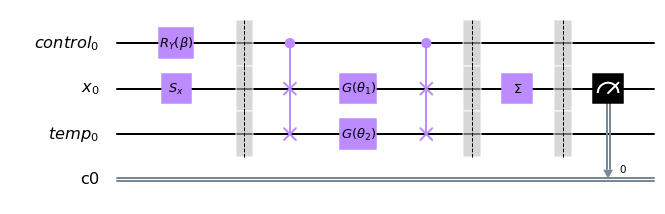

In [32]:
c=create_circuit(parameters=range(7), x=np.array([0,1]))
c.draw(output='mpl')

In [33]:
def execute_circuit(parameters, x=None, shots=1000, print=False):
    backend = BasicAer.get_backend('qasm_simulator')

    circuit=create_circuit(parameters, x)
    if print:
        circuit.draw(output='mpl')
        plt.show()
    result = execute(circuit, backend, shots=shots).result()

    counts = result.get_counts(circuit)
    result = np.zeros(2)
    for key in counts:
        result[int(key, 2)] = counts[key]
    result /= shots
    return result[1]



def cost(params, X, labels):
    predictions = [execute_circuit(params, x) for x in X]
    return binary_crossentropy(labels, predictions)

In [34]:
X = X_norm.copy()
seed = 974 # iris:359, gaussian:527
# seed=np.random.randint(0,10**3,1)[0]
np.random.seed(seed)
current_params = (0.1*np.random.randn(7))

from qiskit.aqua.components.optimizers import AQGD
optimizer_step = AQGD(maxiter=1, eta=2.0, disp=False)
execute_circuit(current_params, x=X[2], print=True)


num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
X_train = X[index[:num_train]]
Y_train = Y[index[:num_train]]
X_val = X[index[num_train:]]
Y_val = Y[index[num_train:]]
batch_size = 20
T = 20
acc_final_tr = 0
acc_final_val = 0

In [35]:
# optimizer_step = AQGD(maxiter=20, eta=2.0, disp=True)

# obj_function = lambda params: cost(params, X_train, Y_train)
# point, value, nfev = optimizer_step.optimize(len(current_params), obj_function, initial_point=current_params)

In [36]:
for i in range(T):
    batch_index = np.random.randint(0, num_train, (batch_size,))
    X_batch = X_train[batch_index]
    Y_batch = Y_train[batch_index]

    obj_function = lambda params: cost(params, X_batch, Y_batch)
    point, value, nfev = optimizer_step.optimize(len(current_params), obj_function,
                                                 initial_point=current_params)
    current_params = point

    # Compute predictions on train and validation set
    probs_train = [execute_circuit(point, x) for x in X_train]
    probs_val = [execute_circuit(point, x) for x in X_val]

    predictions_train = [predict(p) for p in probs_train]
    predictions_val = [predict(p) for p in probs_val]

    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if acc_final_tr < acc_train:
        best_param = point
        acc_final_tr = acc_train
        acc_final_val = acc_val
        iteration = i

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
        "".format(i + 1, cost(point, X_train, Y_train), acc_train, acc_val))

Iter:     1 | Cost: 0.0164748 | Acc train: 0.657 | Acc validation: 0.583 
Iter:     2 | Cost: 0.0149081 | Acc train: 0.800 | Acc validation: 0.833 
Iter:     3 | Cost: 0.0159764 | Acc train: 0.786 | Acc validation: 0.833 
Iter:     4 | Cost: 0.0144240 | Acc train: 0.771 | Acc validation: 0.750 
Iter:     5 | Cost: 0.0139085 | Acc train: 0.729 | Acc validation: 0.792 
Iter:     6 | Cost: 0.0137527 | Acc train: 0.729 | Acc validation: 0.792 
Iter:     7 | Cost: 0.0145151 | Acc train: 0.729 | Acc validation: 0.792 
Iter:     8 | Cost: 0.0139612 | Acc train: 0.771 | Acc validation: 0.833 
Iter:     9 | Cost: 0.0137783 | Acc train: 0.771 | Acc validation: 0.792 
Iter:    10 | Cost: 0.0137149 | Acc train: 0.729 | Acc validation: 0.792 
Iter:    11 | Cost: 0.0135046 | Acc train: 0.743 | Acc validation: 0.792 
Iter:    12 | Cost: 0.0138919 | Acc train: 0.700 | Acc validation: 0.750 
Iter:    13 | Cost: 0.0136241 | Acc train: 0.729 | Acc validation: 0.833 
Iter:    14 | Cost: 0.0155542 | Acc tr

In [37]:
point=best_param

probs_train = [execute_circuit(point, x) for x in X_train]
probs_val = [execute_circuit(point, x) for x in X_val]

predictions_train = [predict(p) for p in probs_train]
predictions_val = [predict(p) for p in probs_val]

acc_train = accuracy(Y_train, predictions_train)
acc_val = accuracy(Y_val, predictions_val)

print("Final model: Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
      "".format(cost(point, X_train, Y_train), acc_train, acc_val))

Final model: Cost: 0.0160203 | Acc train: 0.829 | Acc validation: 0.833 


In [38]:
# probs_train = [execute_circuit(point, x) for x in X_train]
# probs_val = [execute_circuit(point, x) for x in X_val]

# predictions_train = [predict(p) for p in probs_train]
# predictions_val = [predict(p) for p in probs_val]

# acc_train = accuracy(Y_train, predictions_train)
# acc_val = accuracy(Y_val, predictions_val)

# print("Final model: Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
#       "".format(cost(current_params, X_train, Y_train), acc_train, acc_val))

In [39]:
print("Final model: Cost: {:0.7f} | Acc train: {:0.3f} | Acc validation: {:0.3f} "
      "".format(cost(current_params, X_train, Y_train), acc_final_tr, acc_final_val))

Final model: Cost: 0.0146072 | Acc train: 0.829 | Acc validation: 0.833 
